In [1]:
from data_preprocessing.utils import get_freq_dict_from_col
from data_preprocessing.csv_to_db_entry import get_candidate_target_datasets, match_candidate_target_datasets
import pandas as pd
import re

path_to_candidate_dataset = r"test_data/dataset2/candidate_dataset.csv"
path_to_target_dataset = r"test_data/dataset2/target_dataset.csv"

dmetaphone_cols = ["first_name", "surname", "city"]
drop_columns = ["code"]

df_c, df_t = get_candidate_target_datasets(path_to_candidate_dataset, 
                                             path_to_target_dataset,
                                             candidate_dmetaphone_cols=dmetaphone_cols,
                                             target_dmetaphone_cols=dmetaphone_cols,
                                             candidate_drop_columns = drop_columns,
                                             target_drop_columns = drop_columns)

df_matched = match_candidate_target_datasets(df_c,df_t)
pd.options.display.max_colwidth = 1000

250
500
750
1000
1250
1500
1750
2000
2250
2500
2750
3000
3250
3500
3750
4000
4250
4500
4750
5000
5250
5500
5750
6000
6250
6500
6750
7000
7250
7500
7750
8000
8250
8500
8750
9000
9250
9500
9750
10000
10250
10500
10750
11000
11250
11500
11750
12000
12250
12500
12750
13000
13250
13500
13750
14000
14250
14500
14750
15000
15250
15500
15750
16000


In [2]:
df_matched.head()

,auto_generated_row_id_can,auto_generated_row_id_tar,concat_all_can,concat_all_tar,match_probability,match_score
0,candidate_1,target_6336,male john smith london 2012 feb 04 jn sm0 lntn,male john smith london 2012 feb 04 jn sm0 lntn,1.353708e-21,0.695616
1,candidate_2,target_1439,male luke hughes birmingham 2014 29 lk hs prmn,male luke hughes birmingham 2009 jul 12 lk hs prmn,1.478549e-14,0.461005
2,candidate_3,target_63,roberts james liverpool 28 rprt jms lfrp,male james roberts liverpool 2006 mar 16 jms rprt lfrp,1.923080e-13,0.423867
3,candidate_4,target_4496,luke williams leeds 1995 feb 08 lk alms lts,male luke williams leeds 1989 nov 08 lk alms lts,5.526935e-16,0.508584
4,candidate_5,target_3842,oliver hall liverpool 2004 nov alfr hl lfrp,male oliver hall liverpool 2015 aug 04 alfr hl lfrp,2.038776e-13,0.423021


In [3]:
# Want to be able to categorise whether actual match exists or not
df_real = df_c.merge(df_t, left_on="code", right_on="code", how="left", suffixes=["_can", "_tar"])
df_real = df_real[["auto_generated_row_id_can", "auto_generated_row_id_tar", "concat_all_tar"]]
df_real.columns = ["auto_generated_row_id_can", "real_target", "real_target_concat_all"]
# And also match the detected matches
df_matches = df_real.merge(df_matched, left_on="auto_generated_row_id_can", right_on="auto_generated_row_id_can")
df_matches["match_score"] = df_matches["match_score"].fillna(0)

In [4]:
df_matches.to_csv("df_matches.csv", infex=False)

In [13]:
import numpy as np
from sklearn import metrics
# Need one column for whether or not there's a match AND we found the right match, and another one for the score
df_matches["y"] = (df_matches["real_target"] == df_matches["auto_generated_row_id_tar"]).astype(int)
y = np.array(df_matches["y"])
scores = np.array(df_matches["match_score"])
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=1)



In [14]:
def ROC_plot(dfs, names=None, start_tpr = 0.0, finish_fpr = 1.0):


    plt.figure(figsize=(5,5))

    counter = 0
    for df in dfs:
        if names:
            df = df.rename(columns={"tpr": names[counter]})
            plt.plot(df["fpr"], df[names[counter]])
        else:
            plt.plot(df["fpr"], df["tpr"])
        counter +=1

    axes = plt.axes()
    axes.set_xlabel("False positive rate")
    axes.set_ylabel("True positive rate")
    axes.set_title("ROC curve for matcher")

    axes.set_ylim([start_tpr,1])
    axes.set_xlim([0.0,finish_fpr])
    axes.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    axes.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0%}'.format(x)))
    axes.legend()
    plt.show()

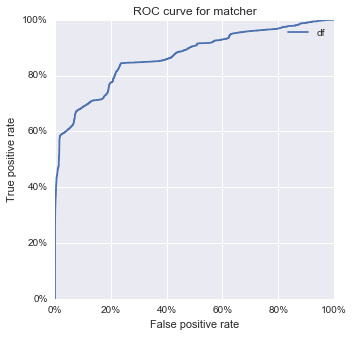

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
from matplotlib.ticker import FuncFormatter
df = pd.DataFrame( {"fpr":fpr, "tpr": tpr, "thres":thresholds})
ROC_plot([df], ["df"])

In [19]:
df_matches = df_matches.sort_values("match_score")

In [29]:
df_matches[df_matches["match_score"]>=0.672135]

,auto_generated_row_id_can,real_target,real_target_concat_all,auto_generated_row_id_tar,concat_all_can,concat_all_tar,match_probability,match_score,y
5854,candidate_5855,target_2708,female chloe hughes london 2013 nov 08 kl hs lntn,target_2708,female chloe hughes london nov 08 kl hs lntn,female chloe hughes london 2013 nov 08 kl hs lntn,6.830451e-21,0.672185,1
9408,candidate_9409,target_4093,female emma davies liverpool 2006 jun 07 am tfs lfrp,target_4093,female davies emma liverpool 2006 jun tfs am lfrp,female emma davies liverpool 2006 jun 07 am tfs lfrp,6.829106e-21,0.672188,1
15346,candidate_15347,target_6464,female rebecca green edinburgh 1999 jan 02 rpk krn atnp,target_6464,female rebecca green edinburgh jan 02 rpk krn atnp,female rebecca green edinburgh 1999 jan 02 rpk krn atnp,6.801527e-21,0.672246,1
3962,candidate_3963,target_8655,female rebecca robinson birmingham 1991 jun 18 rpk rpns prmn,target_8655,female rebecca robinson birmingham 1995 jun 18 rpk rpns prmn,female rebecca robinson birmingham 1991 jun 18 rpk rpns prmn,6.792343e-21,0.672266,1
3613,candidate_3614,target_8272,female chloe walker kirklees 2011 apr 15 kl alkr krkl,target_8272,female chloe walker kirklees 2011 apr kl alkr krkl,female chloe walker kirklees 2011 apr 15 kl alkr krkl,6.789985e-21,0.672271,1
8257,candidate_8258,target_7433,female rebecca smith liverpool 2010 feb 19 rpk sm0 lfrp,target_7433,female rebeacc smith liverpool 2010 feb 19 rpk sm0 lfrp,female rebecca smith liverpool 2010 feb 19 rpk sm0 lfrp,6.786992e-21,0.672277,1
6955,candidate_6956,target_556,female rebecca robinson london 1989 feb 19 rpk rpns lntn,target_556,female rebecca robinson london 1989 feb rpk rpns lntn,female rebecca robinson london 1989 feb 19 rpk rpns lntn,6.776783e-21,0.672299,1
2086,candidate_2087,target_7789,female kate walker edinburgh 2009 jul 09 kt alkr atnp,target_7789,female kate walker edinburgh jul 09 kt alkr atnp,female kate walker edinburgh 2009 jul 09 kt alkr atnp,6.750373e-21,0.672356,1
3055,candidate_3056,target_1350,female hannah brown edinburgh 1995 apr 16 hn prn atnp,target_1350,female hannah brown edinburgh 1995 apr hn prn atnp,female hannah brown edinburgh 1995 apr 16 hn prn atnp,6.748892e-21,0.672359,1
3733,candidate_3734,target_2595,female emily jones birmingham 1987 feb 16 aml jns prmn,target_2595,female emily jones birmingham 1993 feb 16 aml jns prmn,female emily jones birmingham 1987 feb 16 aml jns prmn,6.704758e-21,0.672454,1
